# Домашнее задание к лекции «Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-info">
<b>Задание № 1</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

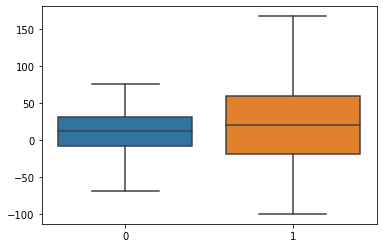

In [3]:
sns.boxplot(data=[A,B])
plt.show()

In [4]:
# Выборки независимы Дисперсионный анализ
fvalue, pvalue = stats.f_oneway(A, B)
print(fvalue, pvalue)

3.0060646842692673 0.08451003973499746


In [5]:
alpha = 0.05
if pvalue > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Одинаковые распределения (не отвергаем H0)


По дисперсионному анализу результаты для группы людей, получающих препарат А и B, имеют одинаковые распределения

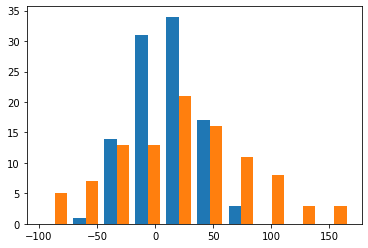

In [6]:
plt.hist([A,B]);

<div class="alert alert-info">
<b>Задание № 2</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [7]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [8]:
# Выборки зависимы, применим критерий Вилкоксона
from scipy.stats import wilcoxon
stat, p = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1930.000, p=0.041


In [9]:
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Разные распределения (отвергаем H0)


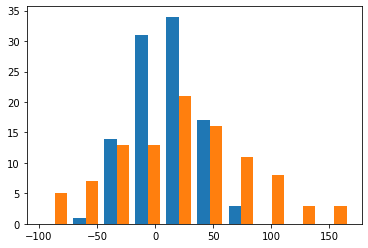

In [10]:
plt.hist([A,B]);

### При условии, что выборки зависимы, по критерию Вилкоксону получаем, что распределения препаратов группами А и В разные 

<div class="alert alert-info">
<b>Задание № 3</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [11]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

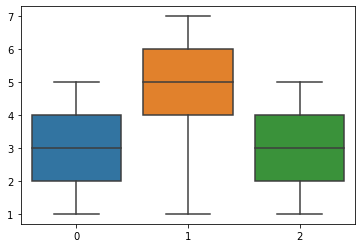

In [12]:
sns.boxplot(data=[water, nutri, mineral])

In [13]:
# Выборки независимы Дисперсионный анализ
fvalue, pvalue = stats.f_oneway(water, nutri, mineral)
print(fvalue, pvalue)
alpha = 0.05
if pvalue > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

12.525963044834192 2.9240047906326866e-05
Разные распределения (отвергаем H0)


### Дисперсионный анализ говорит, что распеделения разные. Посмотрим гистограмму


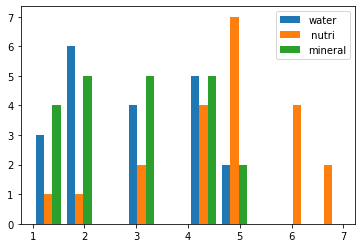

In [14]:
plt.hist([water, nutri, mineral], label=['water',' nutri', 'mineral']);
plt.legend();

### Проверим, есть ли эффект от удобрения по сравнению с минералкой?

In [15]:
# Выборки независимы Дисперсионный анализ
fvalue, pvalue = stats.f_oneway(nutri, mineral)
print(fvalue, pvalue)
alpha = 0.05
if pvalue > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

18.128724672228838 0.0001213673340124552
Разные распределения (отвергаем H0)


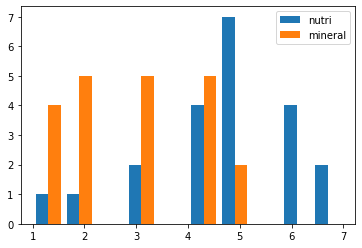

In [16]:
plt.hist([nutri, mineral], label=['nutri', 'mineral']);
plt.legend();

### Эффект от удобрения по сравнению с минералкой есть, так как коэффициент Фишера больше нуля и равен 18,13

# Cookie Cats

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [17]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [18]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [19]:
data.groupby(['version', 'retention_1']).count()

userid  sum_gamerounds  retention_7
version retention_1                                     
gate_30 False         24666           24666        24666
        True          20034           20034        20034
gate_40 False         25370           25370        25370
        True          20119           20119        20119

In [20]:
print("Отношение количества вернувшихся пользователей в первый день к кол-ву невернувшихся для gate_30 ", 20034/24666)
print("Отношение для gate_40 ", 20119/25370)

Отношение количества вернувшихся пользователей в первый день к кол-ву невернувшихся для gate_30  0.8122111408416444
Отношение для gate_40  0.7930232558139535


In [21]:
data.groupby(['version', 'retention_7']).count()

userid  sum_gamerounds  retention_1
version retention_7                                     
gate_30 False         36198           36198        36198
        True           8502            8502         8502
gate_40 False         37210           37210        37210
        True           8279            8279         8279

In [22]:
print("Отношение количества вернувшихся пользователей в первую неделю к кол-ву невернувшихся для gate_30 ", 8502/36198)
print("Отношение для gate_40 ", 8279/37210)

Отношение количества вернувшихся пользователей в первую неделю к кол-ву невернувшихся для gate_30  0.23487485496436267
Отношение для gate_40  0.22249395323837678


### Ваши выводы:
* Как так отношение количества вернувшихся пользователей к кол-ву невернувшихся больше (но незначительно!) для gate_30 по сравнению с gate_40 и в первый день и в первую неделю, можно выдвинуть гипотезу, что ворота нужно ставить на 30 уровне. Проверим!

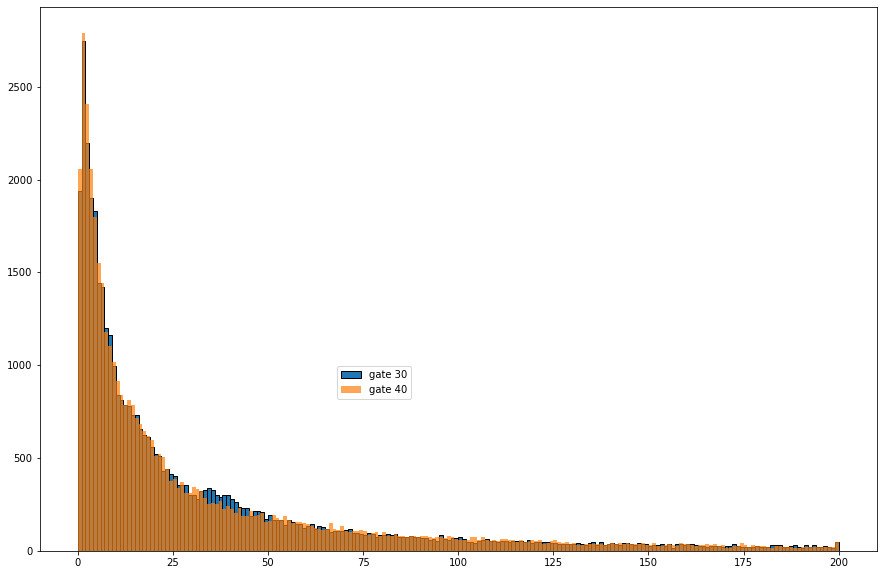

In [23]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

**Ваши выводы**
- Судя по гистограмме, количество игровых раундов, сыгранных игроком в течение первой недели после установки, больше для тестовой группы gate_30

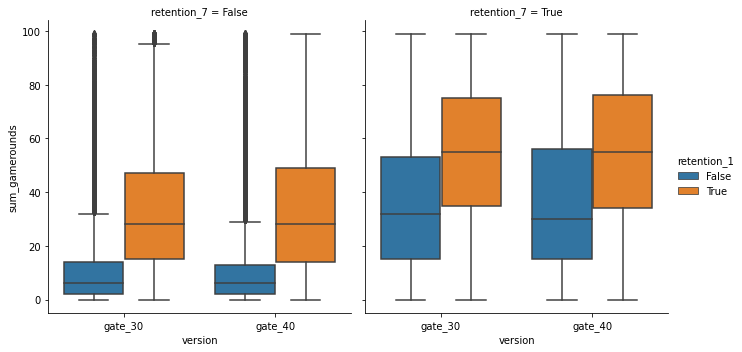

In [24]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<Figure size 1080x720 with 0 Axes>

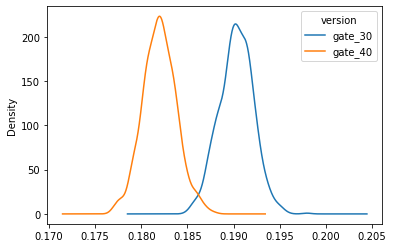

In [45]:
#Если вдруг оказалось сложно, то вот еще один способ визуализации различий
# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [25]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

In [26]:
# Дисперсионный анализ
fvalue, pvalue = stats.f_oneway(data[data.version == 'gate_30']['sum_gamerounds'], data[data.version == 'gate_40']['sum_gamerounds'])
print(fvalue, pvalue)
alpha = 0.05
if pvalue > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

0.7939569526814368 0.3729086824696095
Одинаковые распределения (не отвергаем H0)


**Ваши выводы?** 

### По дисперсионную анализу эффект от сдвига ворот мал, то есть перемещение ворот с 30 уровня на  40 уровень не влияет на удержание игроков.

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [27]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [34]:
grass_attack = pokemon[(pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock')].Attack
grass_attack

0       49
1       62
2       82
3      100
48      50
      ... 
718     61
719     78
720    107
740     65
741    100
Name: Attack, Length: 70, dtype: int64

In [35]:
grass_attack.mean()

73.21428571428571

In [36]:
rock_attack = pokemon[(pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass')].Attack
rock_attack.mean()

94.38095238095238

In [37]:
# Дисперсионный анализ
fvalue, pvalue = stats.f_oneway(grass_attack, rock_attack)
print(fvalue, pvalue)
alpha = 0.05
if pvalue > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

13.591977467682046 0.00035448490090138443
Разные распределения (отвергаем H0)


### Профессор Оук вероятно прав в том, что покемоны в классе grass имеют более сильную обычную атаку, чем у покемонов в классе rock. Статически получили, что распределения разные и коэффициент Фишера больше 1 и равен 13,6, также эту гипотезу подтверждает гистограмма.

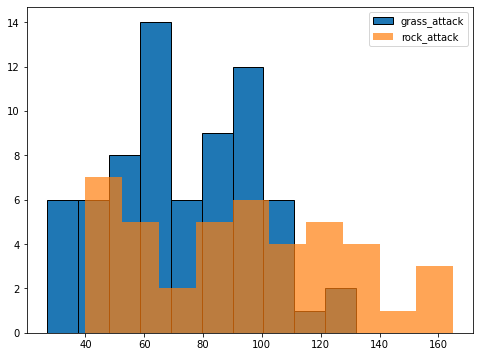

In [39]:
plt.figure(figsize=(8, 6))
plt.hist(grass_attack, bins=10, alpha=1, edgecolor='black', label='grass_attack')
plt.hist(rock_attack, bins=10, alpha=0.7, label='rock_attack')
plt.legend()
plt.show()

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [40]:
water_speed = pokemon[(pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal')].Speed
water_speed.mean()

65.96428571428571

In [41]:
normal_speed = pokemon[(pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water')].Speed
normal_speed.mean()

71.55670103092784

In [42]:
# Дисперсионный анализ
fvalue, pvalue = stats.f_oneway(water_speed, normal_speed)
print(fvalue, pvalue)
alpha = 0.05
if pvalue > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

2.454787240998446 0.11869444763401381
Одинаковые распределения (не отвергаем H0)


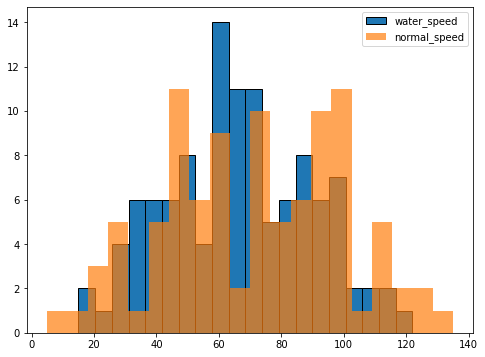

In [44]:
plt.figure(figsize=(8, 6))
plt.hist(water_speed, bins=20, alpha=1, edgecolor='black', label='water_speed')
plt.hist(normal_speed, bins=20, alpha=0.7, label='normal_speed')
plt.legend()
plt.show()

In [45]:
# Сравнение групп
stat, pvalue = mannwhitneyu(water_speed, normal_speed) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if pvalue > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=4783.000, p=0.041
Одинаковые распределения (не отвергаем H0)


### Оба теста: и дисперсионный анализ, и U-тест Манна-Уитни показали, что различия в скорости покемонов класса Water и Normal статически не значимы

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [46]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [47]:
pokemon[pokemon.Name.isin(treathed_pokemon)]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [51]:
# Дисперсионный анализ
fvalue, pvalue = stats.f_oneway(pokemon[pokemon.Name.isin(treathed_pokemon)].Speed, pokemon[pokemon.Name.isin(['Beedrill','Alakazam', 'Normal Forme', 'Lopunny'])].Speed)
print(fvalue, pvalue)
alpha = 0.05
if pvalue > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

14.464285714285715 0.012587298890900022
Разные распределения (отвергаем H0)


### С уровнем значимости 5% можно заключить, что сыворотка Профессора Оука, способная ускорить покемона, работает, так как различия в скоростях покеменов до и после принятия сыворотки статически различны.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [52]:
character_sum = pokemon[pokemon.Legendary == False].apply(lambda row: row['HP'] + row['Attack'] + row['Defense'], axis=1)
character_sum.mean()

214.4108843537415

In [53]:
character_legendary_sum = pokemon[pokemon.Legendary == True].apply(lambda row: row['HP'] + row['Attack'] + row['Defense'], axis=1)
character_legendary_sum.mean()

309.0769230769231

In [54]:
# Дисперсионный анализ
fvalue, pvalue = stats.f_oneway(character_sum, character_legendary_sum)
print(fvalue, pvalue)
alpha = 0.05
if pvalue > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

134.371041285858 7.97094220572035e-29
Разные распределения (отвергаем H0)


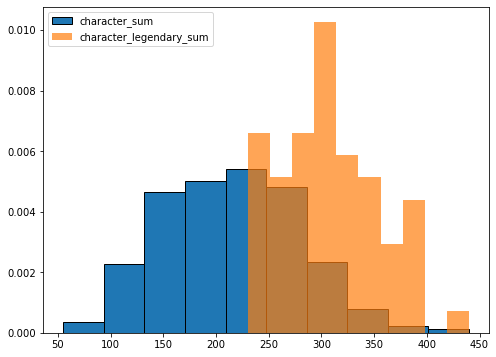

In [55]:
plt.figure(figsize=(8, 6))
plt.hist(character_sum, density=True, bins=10, alpha=1, edgecolor='black', label='character_sum')
plt.hist(character_legendary_sum,density=True, bins=10, alpha=0.7, label='character_legendary_sum')
plt.legend()
plt.show()

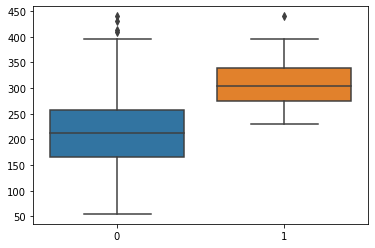

In [56]:
sns.boxplot(data=[character_sum, character_legendary_sum])

### Произведение характеристик

In [57]:
character_mul = pokemon[pokemon.Legendary == False].apply(lambda row: row['HP'] * row['Attack'] * row['Defense'], axis=1)
character_mul.mean()

425041.38911564625

In [58]:
character_legendary_mul = pokemon[pokemon.Legendary == True].apply(lambda row: row['HP'] * row['Attack'] * row['Defense'], axis=1)
character_legendary_mul.mean()

1085941.6153846155

In [59]:
# Дисперсионный анализ
fvalue, pvalue = stats.f_oneway(character_mul, character_legendary_mul)
print(fvalue, pvalue)
alpha = 0.05
if pvalue > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

175.9138909709736 1.9926643088419018e-36
Разные распределения (отвергаем H0)


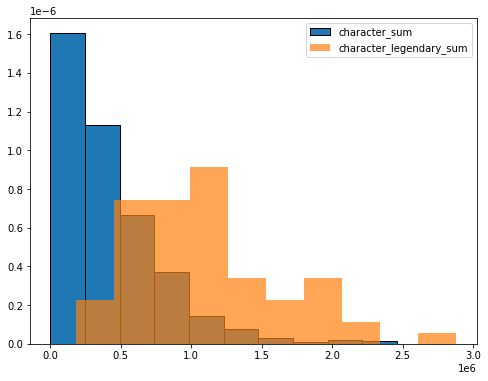

In [60]:
plt.figure(figsize=(8, 6))
plt.hist(character_mul, density=True, bins=10, alpha=1, edgecolor='black', label='character_sum')
plt.hist(character_legendary_mul,density=True, bins=10, alpha=0.7, label='character_legendary_sum')
plt.legend()
plt.show()

### Статически проверено, что сумма и произведение характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов, p-value в обоих случаях стремится к нулю.

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [61]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [62]:
list_ = [pokemon[pokemon['Class 1'] == class_].Defense for class_ in best_defence_class]

In [63]:
fvalue, pvalue = stats.f_oneway(list_[0], list_[1], list_[2], list_[3])
print(fvalue, pvalue)
alpha = 0.05
if pvalue > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

10.576882027817977 3.0803014649204294e-06
Разные распределения (отвергаем H0)


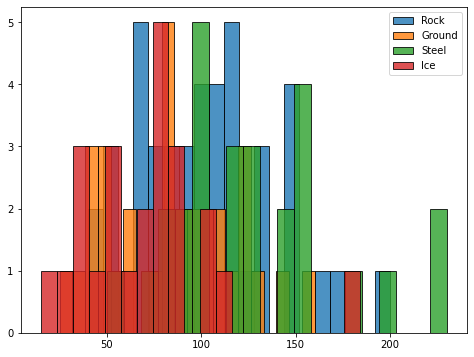

In [64]:
plt.figure(figsize=(8, 6))
for class_ in best_defence_class:
    plt.hist(pokemon[pokemon['Class 1'] == class_].Defense, density=False, edgecolor='black', bins=20, alpha=0.8, label=str(class_))
plt.legend()
plt.show()

### Четыре класса best_defence_class, которые выделил профессор Оук, на самом деле значимо отличаются по уровню защиты

In [65]:
# Сравним отдельно уровень защиты классов Ground и Ice.
fvalue, pvalue = stats.f_oneway(list_[1], list_[3])
print(fvalue, pvalue)
alpha = 0.05
if pvalue > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

2.1333040815446784 0.1499240268241651
Одинаковые распределения (не отвергаем H0)


### При сравнение отдельных классов  Ground и Icе, получаем, что они статически не различимы по уровню защиты

In [66]:
# Сравним отдельно уровень защиты классов Rock и Steel.
fvalue, pvalue = stats.f_oneway(list_[0], list_[2])
print(fvalue, pvalue)
alpha = 0.05
if pvalue > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

6.907774457788713 0.010569395989730512
Разные распределения (отвергаем H0)


### А классы Rock и Steel имеют разные распределения